In [1]:
import numpy as np
from astropy.io import ascii
import _pickle as cPickle

In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
#READ IN PHOTOMETRY FROM AN ASCII FILE
cat = ascii.read("eri2cut.cat")  

xgood=cat[cat.colnames[0]]
ygood=cat[cat.colnames[1]]
m606=cat[cat.colnames[2]]
dm606=cat[cat.colnames[3]]
m814=cat[cat.colnames[4]]
dm814=cat[cat.colnames[5]]
flag=cat[cat.colnames[6]]

In [4]:
len(cat)

11983

In [5]:
def median_interval(data, alpha=0.32):
    """
    Median including Bayesian credible interval.

    Parameters
    ----------
    data  : posterior samples
    alpha : 1 - confidence interval

    Returns
    -------
    [med,[lo, hi]] : median, lower, and upper percentiles
    
    """
    q = [100*alpha/2., 50, 100*(1-alpha/2.)]
    lo,med,hi = np.percentile(data,q)
    return [med,[lo,hi]]

In [6]:
samples = cPickle.load( open( "eri2mcmcFULL.p", "rb" ) )
#MEDIAN VALUES AND +/-1 SIGMA FOR EACH FIT PARAMETER
rich,[rich_min,rich_max] = median_interval(samples[:,0])
x,[xmin,xmax] = median_interval(samples[:,1])
y,[ymin,ymax] = median_interval(samples[:,2])
eri2_ext_fit,[eri2_ext_min,eri2_ext_max] = median_interval(samples[:,3])
eri2_ell_fit,[eri2_ell_min,eri2_ell_max] = median_interval(samples[:,4])
eri2_pa_fit,[eri2_pa_min,eri2_pa_max] = median_interval(samples[:,5])

res = [rich,rich_min,rich_max,x,xmin,xmax,y,ymin,ymax,eri2_ext_fit,eri2_ext_min,eri2_ext_max,\
       eri2_ell_fit,eri2_ell_min,eri2_ell_max,eri2_pa_fit,eri2_pa_min,eri2_pa_max]#,rich_cluster,rich_cluster_min,rich_cluster_max,x_cluster,x_cluster_min,x_cluster_max,y_cluster,y_cluster_min,y_cluster_max,cluster_ext_fit,cluster_ext_min,cluster_ext_max,cluster_ell_fit,cluster_ell_min,cluster_ell_max,cluster_pa_fit,cluster_pa_min,cluster_pa_max]
# results.append(res)

In [61]:
samples = cPickle.load( open( "eri2mcmcCLUS.p", "rb" ) )

#MEDIAN VALUES AND +/-1 SIGMA FOR EACH FIT PARAMETER
rich,[rich_min,rich_max] = median_interval(samples[:,0])
x,[xmin,xmax] = median_interval(samples[:,1])
y,[ymin,ymax] = median_interval(samples[:,2])
eri2_ext_fit,[eri2_ext_min,eri2_ext_max] = median_interval(samples[:,3])
eri2_ell_fit,[eri2_ell_min,eri2_ell_max] = median_interval(samples[:,4])
eri2_pa_fit,[eri2_pa_min,eri2_pa_max] = median_interval(samples[:,5])

# rich_cluster,[rich_cluster_min,rich_cluster_max] = median_interval(samples[:,6])
# x_cluster,[x_cluster_min,x_cluster_max] = median_interval(samples[:,7])
# y_cluster,[y_cluster_min,y_cluster_max] = median_interval(samples[:,8])
# cluster_ext_fit,[cluster_ext_min,cluster_ext_max] = median_interval(samples[:,9])
# cluster_ell_fit,[cluster_ell_min,cluster_ell_max] = median_interval(samples[:,10])
# cluster_pa_fit,[cluster_pa_min,cluster_pa_max] = median_interval(samples[:,11])


res = [rich,rich_min,rich_max,x,xmin,xmax,y,ymin,ymax,eri2_ext_fit,eri2_ext_min,eri2_ext_max,\
       eri2_ell_fit,eri2_ell_min,eri2_ell_max,eri2_pa_fit,eri2_pa_min,eri2_pa_max] #rich_cluster,\
#        rich_cluster_min,rich_cluster_max,x_cluster,x_cluster_min,x_cluster_max,y_cluster,\
#        y_cluster_min,y_cluster_max,cluster_ext_fit,cluster_ext_min,cluster_ext_max,\
#        cluster_ell_fit,cluster_ell_min,cluster_ell_max,cluster_pa_fit,cluster_pa_min,cluster_pa_max]

In [62]:
print(res)

[29625.60144527568, 28700.496170665145, 30634.914080919843, 4121.089120960359, 4069.524371888049, 4175.138844690306, 3601.060835622961, 3576.9130120770596, 3625.2144071297166, 5193.673688473831, 4998.317412591178, 5410.701962704743, 0.4461005692825447, 0.42454119582403826, 0.4677216077992698, 77.74118481973353, 76.56066372971482, 78.93077489105298]


In [8]:
pix_per_arcsec = 1/0.035

In [60]:
print((5193-4998)/pix_per_arcsec/60)

0.11375


In [63]:
# BEST-FIT ERI II PARAMETERS (FROM MCMC_STRUCTURAL_FIT_ERI2_FINAL.IPYNB)
# richness = 29662
# x0 = 4123.4
# y0 = 3601.7
# eri_ext_pix = 5205.
# eri_ell = 0.447
# eri_pa = 77.8

richness = rich
x0 = x
y0 = y
eri_ext_pix = eri2_ext_fit
eri_ell = eri2_ell_fit
eri_pa = eri2_pa_fit

# PIXAREA  =((0.035/3600.)*XDEL)*( (0.035/3600.)*YDEL)

In [64]:
xbin0 = np.ones((267,1))  # (fltarr(267)+1)
xbin1 = np.ones((1,267))  
xbin1[0] = np.arange(0,267,1)
xbin2 = xbin1 * 30 + 15  # (findgen(267)*30. + 15)
xbin = np.matmul(xbin0,xbin2)
ybin = xbin.T

# creating x and y arrays to represent the bins across the image

In [65]:
costh = np.cos(-1 * np.deg2rad(eri_pa))
sinth = np.sin(-1 * np.deg2rad(eri_pa))
# print(sinth)
dx = xbin - x0
dy = ybin - y0

In [66]:
r1 = (dx * costh - dy * sinth) / (1 - eri_ell)
r2 = (dx * sinth + dy * costh)

radius = np.sqrt(r1**2 + r2**2)
# calculating distances to different bins in the annuli based on the PA

In [67]:
r_h = eri_ext_pix
norm = r_h**2 / (np.pi * (1-eri_ell))
# half light radius squared / (pi * 1-ell)
pdf = norm/((radius**2 + r_h**2)**2)

In [68]:
xdel = 30.
ydel = 30.
pixarea = xdel*ydel  # pixel area in each bin

In [69]:
model_counts_eri2 = richness*pdf*pixarea  # a 267x267 array

In [70]:
model_counts_eri2[0:5,0:5]

array([[0.04136198, 0.041671  , 0.04198182, 0.04229443, 0.04260883],
       [0.04202531, 0.04234108, 0.04265871, 0.04297818, 0.0432995 ],
       [0.04269978, 0.04302246, 0.04334705, 0.04367355, 0.04400195],
       [0.04338558, 0.04371532, 0.04404703, 0.0443807 , 0.04471634],
       [0.04408285, 0.04441981, 0.0447588 , 0.04509982, 0.04544286]])

In [71]:
# Observed surface density map
binned_surface_density_30 = np.zeros((267,267))
for ii in range(267):
    for jj in range(267):
        idx = np.logical_and(np.logical_and(xgood >= (30 * ii),xgood <= (30 * (ii + 1))),
                     np.logical_and(ygood >= (30 * jj),ygood <= (30 * (jj + 1))))

        tmp = np.where(idx)[0]
#         # flipping ii and jj because in IDL, it's col, row.
        binned_surface_density_30[jj,ii] = len(tmp)

In [72]:
# Define annuli
radius1=radius.flatten()
r1 = np.where(radius1 < (0.1 * r_h))
r2 = np.where((radius1 < (0.2 * r_h)) & (radius1 >= (0.1 * r_h)))
r3 = np.where((radius1 < (0.3 * r_h)) & (radius1 >= (0.2 * r_h)))
r4 = np.where((radius1 < (0.4 * r_h)) & (radius1 >= (0.3 * r_h)))
r5 = np.where((radius1 < (0.5 * r_h)) & (radius1 >= (0.4 * r_h)))
r6 = np.where((radius1 < (0.6 * r_h)) & (radius1 >= (0.5 * r_h)))
r7 = np.where((radius1 < (0.7 * r_h)) & (radius1 >= (0.6 * r_h)))
r8 = np.where((radius1 < (0.8 * r_h)) & (radius1 >= (0.7 * r_h)))
r9 = np.where((radius1 < (0.9 * r_h)) & (radius1 >= (0.8 * r_h)))
r10 = np.where((radius1 < r_h) & (radius1 >= (0.9 * r_h)))

In [73]:
r1v = r1[0]
r2v = r2[0]
r3v = r3[0]
r4v = r4[0]
r5v = r5[0]
r6v = r6[0]
r7v = r7[0]
r8v = r8[0]
r9v = r9[0]
r10v = r10[0]

In [93]:
# areas of annuli in arcmin**2

a1 = (np.pi*(r_h*0.1)**2*(1-eri_ell))/(pix_per_arcsec*60)**2
a2 = (np.pi*(r_h*0.2)**2*(1-eri_ell) - np.pi*(r_h*0.1)**2*(1-eri_ell))/(pix_per_arcsec*60)**2
a3 = (np.pi*(r_h*0.3)**2*(1-eri_ell) - np.pi*(r_h*0.2)**2*(1-eri_ell))/(pix_per_arcsec*60)**2
a4 = (np.pi*(r_h*0.4)**2*(1-eri_ell) - np.pi*(r_h*0.3)**2*(1-eri_ell))/(pix_per_arcsec*60)**2
a5 = (np.pi*(r_h*0.5)**2*(1-eri_ell) - np.pi*(r_h*0.4)**2*(1-eri_ell))/(pix_per_arcsec*60)**2
a6 = (np.pi*(r_h*0.6)**2*(1-eri_ell) - np.pi*(r_h*0.5)**2*(1-eri_ell))/(pix_per_arcsec*60)**2
a7 = (np.pi*(r_h*0.7)**2*(1-eri_ell) - np.pi*(r_h*0.6)**2*(1-eri_ell))/(pix_per_arcsec*60)**2
a8 = (np.pi*(r_h*0.8)**2*(1-eri_ell) - np.pi*(r_h*0.7)**2*(1-eri_ell))/(pix_per_arcsec*60)**2
a9 = (np.pi*(r_h*0.9)**2*(1-eri_ell) - np.pi*(r_h*0.8)**2*(1-eri_ell))/(pix_per_arcsec*60)**2
a10 = (np.pi*(r_h*1.0)**2*(1-eri_ell) - np.pi*(r_h*0.9)**2*(1-eri_ell))/(pix_per_arcsec*60)**2

In [94]:
binned_surface_density_30f = binned_surface_density_30.flatten()
model_counts_eri2f = model_counts_eri2.flatten()
data_1d = [binned_surface_density_30f[r1v].sum()/a1,
           binned_surface_density_30f[r2v].sum()/a2,
           binned_surface_density_30f[r3v].sum()/a3,
           binned_surface_density_30f[r4v].sum()/a4,
           binned_surface_density_30f[r5v].sum()/a5,
           binned_surface_density_30f[r6v].sum()/a6,
           binned_surface_density_30f[r7v].sum()/a7,
           binned_surface_density_30f[r8v].sum()/a8,
           binned_surface_density_30f[r9v].sum()/a9,
           binned_surface_density_30f[r10v].sum()/a10]

model_1d = [model_counts_eri2f[r1v].sum()/a1,
            model_counts_eri2f[r2v].sum()/a2,
            model_counts_eri2f[r3v].sum()/a3,
            model_counts_eri2f[r4v].sum()/a4,
            model_counts_eri2f[r5v].sum()/a5,
            model_counts_eri2f[r6v].sum()/a6,
            model_counts_eri2f[r7v].sum()/a7,
            model_counts_eri2f[r8v].sum()/a8,
            model_counts_eri2f[r9v].sum()/a9,
            model_counts_eri2f[r10v].sum()/a10]

In [95]:
area = np.array([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10])

In [96]:
dist_x = np.array([r_h*0.1,r_h*0.2,r_h*0.3,r_h*0.4,r_h*0.5,r_h*0.6,r_h*0.7,r_h*0.8,r_h*0.9,r_h])/(pix_per_arcsec*60)

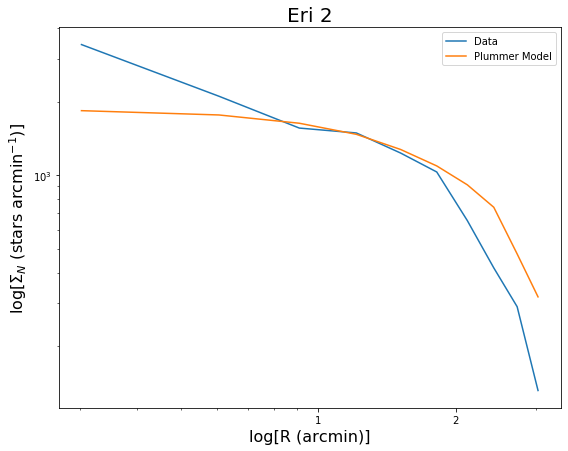

In [98]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(dist_x,data_1d,label='Data')
ax.plot(dist_x,model_1d,label='Plummer Model')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'log[$\Sigma_N$ (stars arcmin$^{-1}$)]',fontsize=16)
ax.set_xlabel(r'log[R (arcmin)]',fontsize=16)
ax.set_title('Eri 2',fontsize=20)

ax.set_xticks([1, 2])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())



ax.legend()
# plt.savefig('figures/eri2.png')

plt.show()

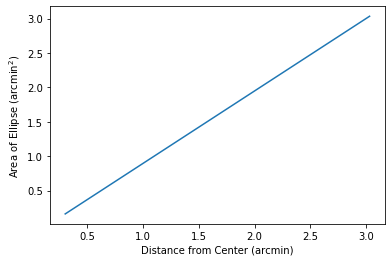

In [84]:
fig, ax = plt.subplots()

ax.plot(dist_x,area)
# ax.set_yscale('log')
ax.set_xlabel('Distance from Center (arcmin)')
ax.set_ylabel(r'Area of Ellipse (arcmin$^2$)')


# ax.set_ylabel('Test')

plt.show()

In [98]:
ra1 = np.arange(0,10,1)
r_annuli = (ra1 + 0.05) * r_h

In [99]:
print((ra1 + 0.05))

[0.05 1.05 2.05 3.05 4.05 5.05 6.05 7.05 8.05 9.05]


In [100]:
binned_surface_density_30f = binned_surface_density_30.flatten()
model_counts_eri2f = model_counts_eri2.flatten()
data_1d = [binned_surface_density_30f[r1v].sum(),
           binned_surface_density_30f[r2v].sum(),
           binned_surface_density_30f[r3v].sum(),
           binned_surface_density_30f[r4v].sum(),
           binned_surface_density_30f[r5v].sum(),
           binned_surface_density_30f[r6v].sum(),
           binned_surface_density_30f[r7v].sum(),
           binned_surface_density_30f[r8v].sum(),
           binned_surface_density_30f[r9v].sum(),
           binned_surface_density_30f[r10v].sum()]

model_1d = [model_counts_eri2f[r1v].sum(),
            model_counts_eri2f[r2v].sum(),
            model_counts_eri2f[r3v].sum(),
            model_counts_eri2f[r4v].sum(),
            model_counts_eri2f[r5v].sum(),
            model_counts_eri2f[r6v].sum(),
            model_counts_eri2f[r7v].sum(),
            model_counts_eri2f[r8v].sum(),
            model_counts_eri2f[r9v].sum(),
            model_counts_eri2f[r10v].sum()]

In [101]:
data_1d

[454.0, 869.0, 939.0, 1313.0, 1528.0, 1605.0, 1620.0, 1237.0, 923.0, 700.0]

In [102]:
model_1d

[261.0517956220859,
 746.1662376070768,
 1159.5452590353027,
 1451.8580481600375,
 1629.1838897011517,
 1697.7172799493044,
 1681.5963488042212,
 1609.379457718307,
 1501.7517585718242,
 1249.8836673983512]

In [103]:
binned_surface_density_30f[r1v].sum()

454.0

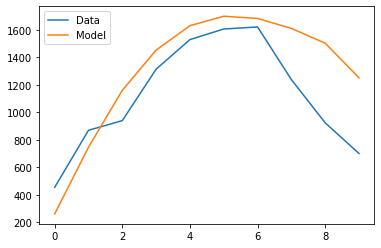

In [104]:
fig, ax = plt.subplots()

ax.plot(ra1,data_1d,label='Data')
ax.plot(ra1,model_1d,label='Model')

ax.legend()
plt.show()

In [105]:
import matplotlib.pyplot as plt

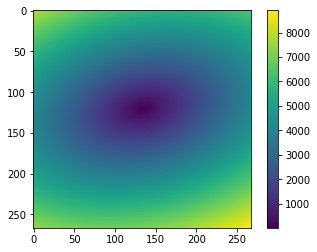

In [106]:
fig,ax = plt.subplots()

plt.imshow(radius)
plt.colorbar()